#Importing libraries, modules

In [1]:
# # Check libcudnn8 version
# !apt-cache policy libcudnn8

# # Install latest version
# !apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# # Export env variables
# !export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
# !export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
# !export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
# !export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# # Install tensorflow
# !pip install tflite-model-maker==0.4.0
# !pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
# !pip install pycocotools==2.0.4
# !pip install opencv-python-headless==4.6.0.66

In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.applications import MobileNetV2 as MobileNet
#kita pake mobilenet yang dari dosen pembimbing
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
#import the library that we want to use
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os


#Mount access to Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#seed split data

sid=223
data_dirtrain='/content/drive/MyDrive/Kulitku Final/Train'
data_dirtest='/content/drive/MyDrive/Kulitku Final/Test'
data_dirvalid='/content/drive/MyDrive/Kulitku Final/Valid'

#Data Splitting to Training

In [5]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dirtrain,
  # shuffle=True,
  seed=sid,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 799 files belonging to 4 classes.


#Data Splitting to Validation

In [6]:
#split data ke validating
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dirtest,
  # shuffle=True,
  seed=sid,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 4 classes.


#Defining Class Name

In [7]:
classnames = train_ds.class_names
print(classnames,"\n",len(classnames))

['Jerawat', 'Kutil', 'Melasma', 'Milia'] 
 4


#Showing The Dataset Image

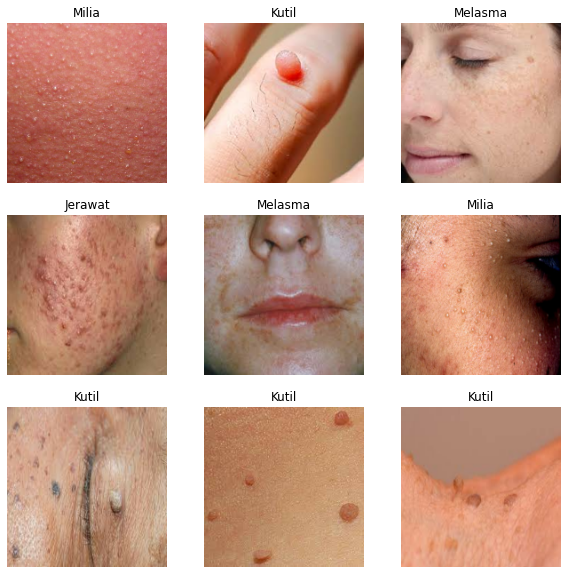

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[labels[i]])
    plt.axis("off")

#Pre-Trained Model

In [9]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense,Flatten,Dropout
resnet_model = ''
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=4,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

#sama kaya diatas cuma dipisah MODELLLL

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.3))
resnet_model.add(Dense(4, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 2

In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

#Training The Model

In [12]:
resnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])
callbacks = myCallback()
history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
25/25 [==============================] - 60s 2s/step - loss: 7.5697 - accuracy: 0.4881 - val_loss: 0.9492 - val_accuracy: 0.6250
Epoch 2/15
25/25 [==============================] - 4s 124ms/step - loss: 0.7140 - accuracy: 0.7121 - val_loss: 0.8454 - val_accuracy: 0.6875
Epoch 3/15
25/25 [==============================] - 4s 125ms/step - loss: 0.5111 - accuracy: 0.7985 - val_loss: 0.7374 - val_accuracy: 0.7375
Epoch 4/15
25/25 [==============================] - 4s 127ms/step - loss: 0.3691 - accuracy: 0.8486 - val_loss: 1.0705 - val_accuracy: 0.7250
Epoch 5/15
25/25 [==============================] - 5s 159ms/step - loss: 0.3590 - accuracy: 0.8623 - val_loss: 0.9329 - val_accuracy: 0.8000
Epoch 6/15
25/25 [==============================] - 8s 247ms/step - loss: 0.3429 - accuracy: 0.8949 - val_loss: 0.7545 - val_accuracy: 0.7750
Epoch 7/15
25/25 [==============================] - 8s 237ms/step - loss: 0.2830 - accuracy: 0.8999 - val_loss: 0.8509 - val_accuracy: 0.7500
Epoch 8/

#Model Evaluation

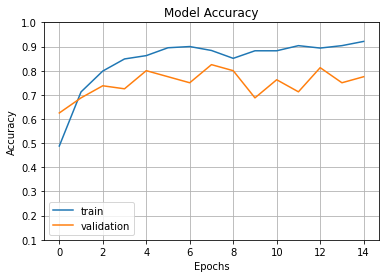

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [14]:
persenhasil,total=0,0

#Checking image quality

In [15]:
import cv2
dircheck=data_dirtrain

from PIL import Image
import os, random
i=0
for classes in os.listdir(dircheck):
  persenhasil,total=0,0
  for i in range(200):
    pathcoba      = os.path.join(dircheck,classes)
    asalimg       = random.choice(os.listdir(pathcoba))
    asal_pilih    = os.path.join(pathcoba,asalimg)
    img           = cv2.imread(asal_pilih)
    image_resized = cv2.resize(img,(img_height,img_width))
    img           = np.expand_dims(image_resized,axis=0)
    pred          = resnet_model.predict(img)
    output_class  = classnames[np.argmax(pred)]
    if (i%50==0):
      print("image "+ str(i)+" ",asalimg,"The predicted class for",classes," is",output_class + " and it is",output_class==classes)

    if(output_class==classes):
      persenhasil+=1
      total+=1
    else :
      total+=1
  print('\033[1m'+"persentase total",classes, (persenhasil/total)*100,"%"+'\033[0m')

image 0  Milia68.jpg The predicted class for Milia  is Milia and it is True
image 50  Milia44.jpg The predicted class for Milia  is Milia and it is True
image 100  Milia66.jpg The predicted class for Milia  is Melasma and it is False
image 150  Milia12.jpg The predicted class for Milia  is Milia and it is True
persentase total Milia 98.0 %
image 0  ilustrasi-kutil-istock_ratio-16x9.jpeg The predicted class for Kutil  is Milia and it is False
image 50  images (36) copy 2.jpeg The predicted class for Kutil  is Kutil and it is True
image 100  images (10) copy 2.jpeg The predicted class for Kutil  is Kutil and it is True
image 150  images (42).jpeg The predicted class for Kutil  is Kutil and it is True
persentase total Kutil 88.0 %
image 0  HelloIMG1654444338508 copy.jpeg The predicted class for Melasma  is Melasma and it is True
image 50  HelloIMG1654445200014.jpeg The predicted class for Melasma  is Melasma and it is True
image 100  HelloIMG1654444338508.jpeg The predicted class for Mela

#Importing Model

In [16]:
resnet_model.save('./model with melasma paling baru terverifikasi.h5', save_format='h5')
# loading the saved model

In [17]:
!mkdir -p saved_model
resnet_model.save('saved_model/model with melasma paling baru terverifikasi')

In [18]:
import shutil
dir_to_zip = '/content/saved_model/model with melasma paling baru terverifikasi'
output_filename = 'model with melasma mantap'
shutil.make_archive(output_filename, 'zip', dir_to_zip)

'/content/model with melasma mantap.zip'

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)